# APRENDIZAJE NO SUPERVISADO

In [6]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

## Clustering

### K-means

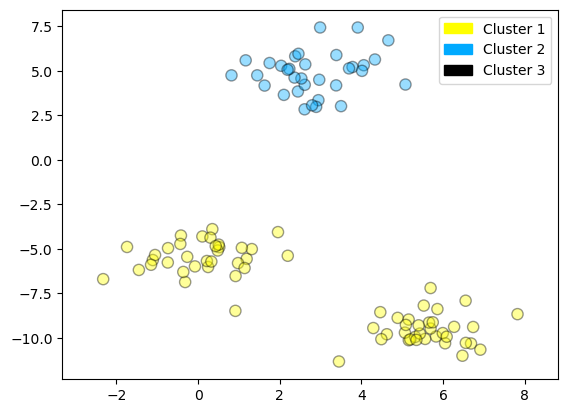

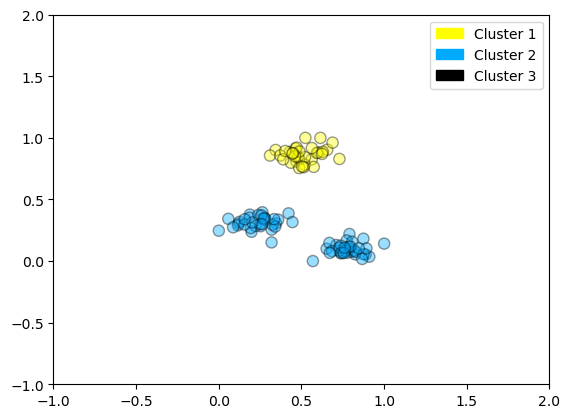

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

X, y = make_blobs(random_state = 10)

import matplotlib.pyplot as plt



X_normalized = MinMaxScaler().fit(X).transform(X) 



kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


kmeans.fit(X_normalized)

plot_labelled_scatter(X_normalized, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

#ES UNSUPERVISED YA NO HAY TRAINIG Y TESTING
#PODEIS PROBAR PARA OTROS CLUSTERS

X, y = make_blobs(random_state = 10)

X_normalized = MinMaxScaler().fit(X).transform(X) 
#CLUSTERING TAMBIEN SE PUEDE BENEFICIAR DE NORMALIZACION


kmeans = KMeans(init='k-means++', n_clusters = 3, n_init=10)
kmeans.fit(X_normalized)

#PROBAR OTROS N_CLUSTER
#PROBAR OTORS n_CLUSTER

KMeans(n_clusters=3, n_init=10)

In [19]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[0.23794168 0.31237463]
 [0.50910997 0.86227808]
 [0.78289451 0.095112  ]]
1.1491408486878039


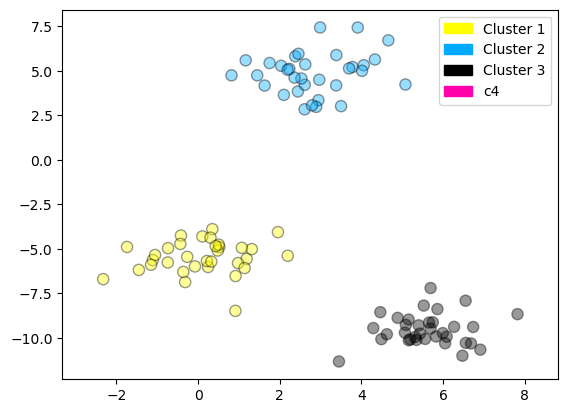

In [20]:
plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3','c4'])



Initialization complete
Iteration 0, inertia 1.573880237863705.
Iteration 1, inertia 1.1491408486878039.
Converged at iteration 1: strict convergence.


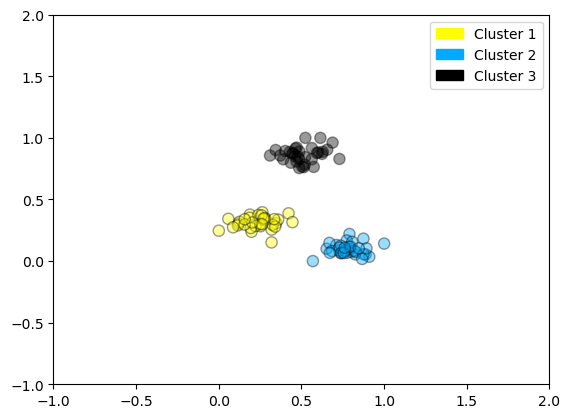

In [32]:

kmeans = KMeans( n_clusters = 3, verbose=2)

kmeans.fit(X_normalized)

plot_labelled_scatter(X_normalized, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [33]:
kmeans.cluster_centers_

array([[0.23794168, 0.31237463],
       [0.78289451, 0.095112  ],
       [0.50910997, 0.86227808]])

In [34]:
kmeans.labels_

array([0, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0,
       2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1], dtype=int32)

In [35]:
kmeans.n_iter_

2

In [30]:
kmeans.predict([[0, 0], [1, 1]])

array([1, 0], dtype=int32)

In [31]:
kmeans.inertia_

1.1491408486878039

## SELECCION DEL NUMERO OPTIMO DE CLUSTERS MEDIANTE EL METODO DEL CODO ( K vs inertia_ )

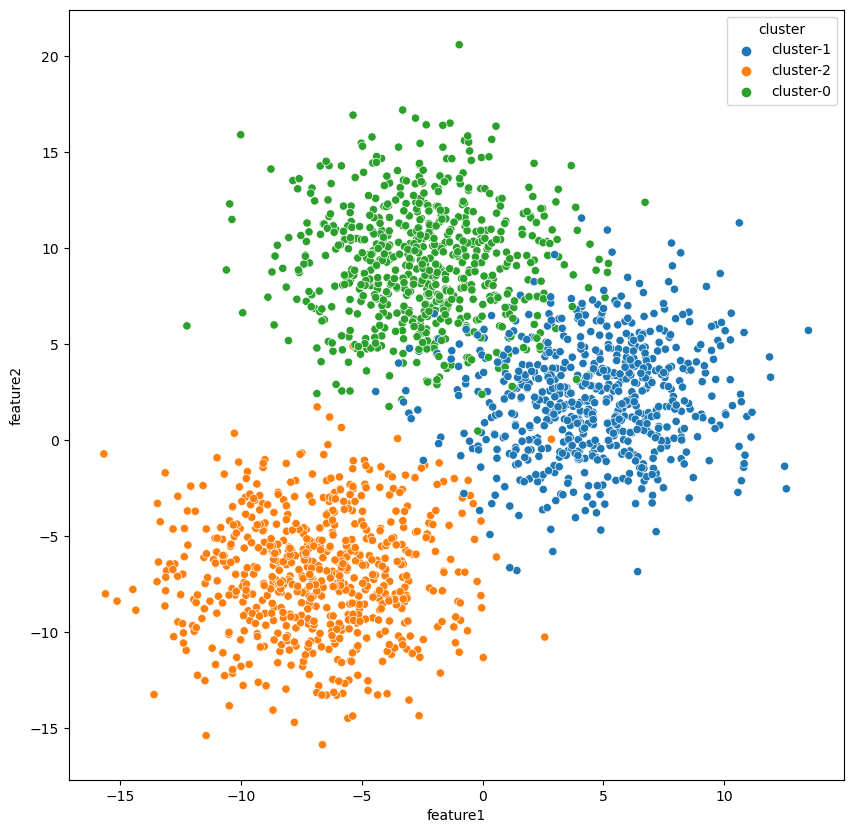

In [38]:
# Assistant
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt  # Added missing import
import pandas as pd  # Added for DataFrame creation

# Generate the data
n_samples = 2000
n_features = 2
centers = 3
cluster_std = 3

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, 
                  cluster_std=cluster_std, random_state=42)

# Create a DataFrame for better seaborn integration
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['cluster'] = ['cluster-{}'.format(x) for x in y]

# Create the plot
fig = plt.figure(figsize=(10, 10))
# Corrected scatterplot syntax using x=, y=, and data= parameters
sns.scatterplot(data=df, x='feature1', y='feature2', hue='cluster')
plt.show()  # Added to display the plot

For n_clusters = 2 The inertia is : 67648.55689693673
For n_clusters = 3 The inertia is : 33893.389341655806
For n_clusters = 4 The inertia is : 29644.124285147424
For n_clusters = 5 The inertia is : 25661.375967206925
For n_clusters = 6 The inertia is : 21745.262746307024
For n_clusters = 7 The inertia is : 19372.984143855385
For n_clusters = 8 The inertia is : 16646.297803667927
For n_clusters = 9 The inertia is : 16458.26168483634
For n_clusters = 10 The inertia is : 14031.910756115274
For n_clusters = 11 The inertia is : 12848.887598183257
For n_clusters = 12 The inertia is : 11534.67170715487
For n_clusters = 13 The inertia is : 10949.450759889029
For n_clusters = 14 The inertia is : 10154.806069766404
For n_clusters = 15 The inertia is : 9424.439862933299
For n_clusters = 16 The inertia is : 9199.920097489554
For n_clusters = 17 The inertia is : 8872.958962046692
For n_clusters = 18 The inertia is : 8008.402049381197
For n_clusters = 19 The inertia is : 7679.543136793762


Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

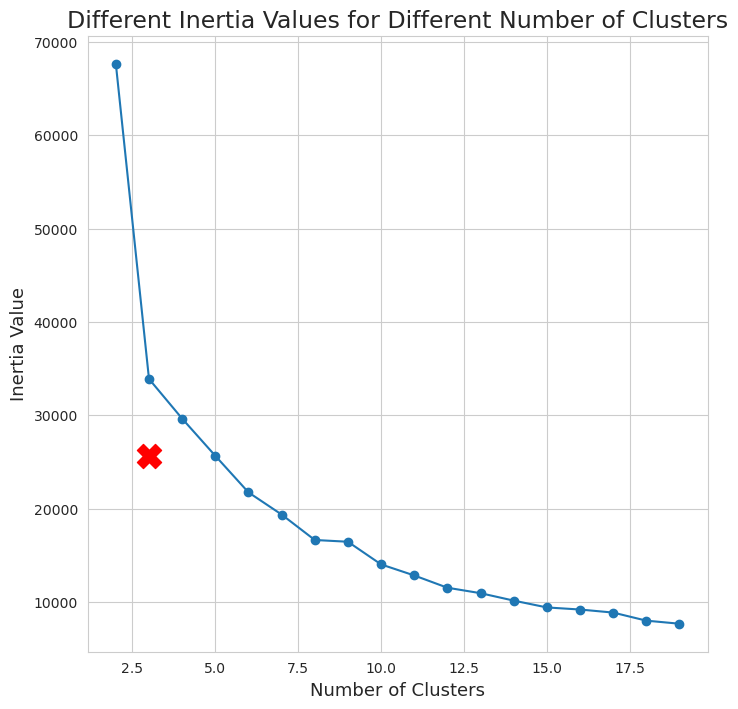

In [39]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(2, 20):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)
    
    print(        "For n_clusters =", num_clusters,"The inertia is :", kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(2,20),inertia_list)
plt.scatter(range(2,20),inertia_list)
plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

OTRO EJEMPLO DE SELECCION DEL NUMERO OPTIMO DE CLUSTERS K USANDO EL METODO DEL CODO (ELBOW METHOD) Y LA INTERTIA_

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
#data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]
data=X

sse = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,init='k-means++').fit(data)
    
    cluster_labels = kmeans.labels_
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    
    
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(        "For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
    
    davies = davies_bouldin_score(data, cluster_labels)
    print(        "For n_clusters =", k,"The average davies_boulder is is :", davies)
    
    
#plt.figure()
#plt.plot(list(sse.keys()), list(sse.values()))
#plt.xlabel("Number of cluster")
#plt.ylabel("SSE")
#plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 2 The average davies_boulder is is : 0.40429283717304343
For n_clusters = 3 The average silhouette_score is : 0.5528190123564095
For n_clusters = 3 The average davies_boulder is is : 0.6619715465007465
For n_clusters = 4 The average silhouette_score is : 0.49535632852884987
For n_clusters = 4 The average davies_boulder is is : 0.763894658536336
For n_clusters = 5 The average silhouette_score is : 0.431277783263882
For n_clusters = 5 The average davies_boulder is is : 0.8994626111980398
For n_clusters = 6 The average silhouette_score is : 0.3354538009521549
For n_clusters = 6 The average davies_boulder is is : 1.0158106524632893
For n_clusters = 7 The average silhouette_score is : 0.3477805342731895
For n_clusters = 7 The average davies_boulder is is : 0.9737800859766489
For n_clusters = 8 The average silhouette_score is : 0.34517114214355343
For n_clusters = 8 The average davies_boulder is is : 0.9

### OTRAS METRICAS PARA MEDIR CLUSTERS

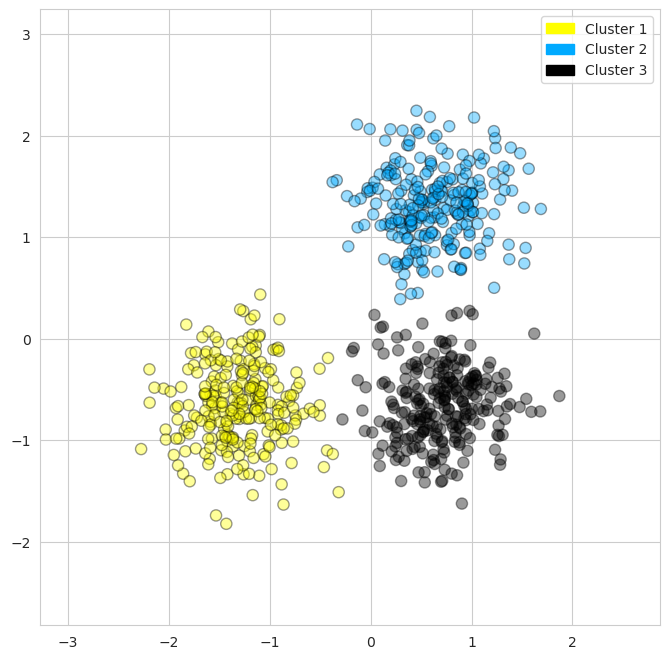

In [119]:
from sklearn import datasets
from adspy_shared_utilities import plot_labelled_scatter
iris = datasets.load_iris()
#X = iris.data
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# #############################################################################



kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

cls_assignment = kmeans.fit_predict(X)
plot_labelled_scatter(X, cls_assignment,         ['Cluster 1', 'Cluster 2', 'Cluster 3'])

#cls_assignment



In [121]:
labels = kmeans.labels_
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
print(davies_bouldin_score(X, labels))
print(silhouette_score(X, labels))

[[-1.30266211 -0.65704205]
 [ 0.62260555  1.3172598 ]
 [ 0.6954587  -0.64442334]]
212.39132249472704
0.47620136185481926
0.6496075455022047


For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.5511916046195919
For n_clusters = 4 The average silhouette_score is : 0.4152073707912019
For n_clusters = 5 The average silhouette_score is : 0.4922441515961953
For n_clusters = 6 The average silhouette_score is : 0.47267827445316146
For n_clusters = 7 The average silhouette_score is : 0.4621733522969747
For n_clusters = 8 The average silhouette_score is : 0.35006029596867366
For n_clusters = 9 The average silhouette_score is : 0.33295790561682


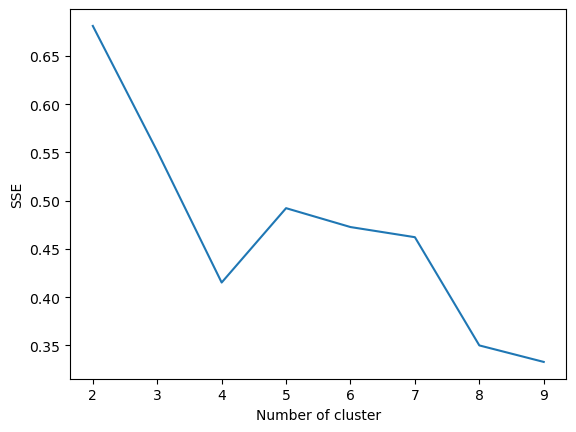

In [15]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++').fit(X)
    
    cluster_labels = kmeans.labels_
    
    #print(data["clusters"])
    #sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(        "For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
    sse[k]=silhouette_avg
   
    
    #davies = davies_bouldin_score(X, cluster_labels)
    #print(        "For n_clusters =", k,"The average davies_boulder is is :", davies)
    
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

SE PUEDE ACCEDER AL VALOR INDIVIDUAL DE SILHOUETTE PARA CADA PUNTO....

In [126]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
   
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(        "For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    #print(sample_silhouette_values)

    

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469
For n_clusters = 7 The average silhouette_score is : 0.49731550839901734
For n_clusters = 8 The average silhouette_score is : 0.38073084401226504
For n_clusters = 9 The average silhouette_score is : 0.3839537100348846
For n_clusters = 10 The average silhouette_score is : 0.3912884245125424


### Agglomerative clustering

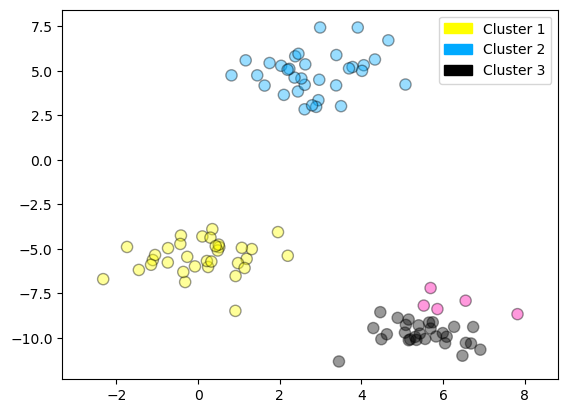

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10) #100 por defectos n_samples

#efecto linkaege

cls = AgglomerativeClustering(n_clusters = 4, linkage='complete')
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [17]:
cls.cluster_centers_ #hacer con labels_

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

In [133]:
cls_assignment

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 3, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 3, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 3, 0, 3, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2])

In [135]:
cls.predict([[1,1]])

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [52]:
cls.intertia_ # las otras metricas si se pueden calcular

AttributeError: 'AgglomerativeClustering' object has no attribute 'intertia_'

In [137]:
cls.labels_

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 3, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 3, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 3, 0, 3, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2])

In [18]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

sse = {}
for k in range(2, 10):
    cls = AgglomerativeClustering(n_clusters = k, linkage='complete')
    cls_assignment = cls.fit_predict(X)
    
   
     
    
    
    silhouette_avg = silhouette_score(X, cls_assignment)
    print(        "For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
    
   
    
    #davies = davies_bouldin_score(X, cls_assignment)
    #print(        "For n_clusters =", k,"The average davies_boulder is is :", davies)

For n_clusters = 2 The average silhouette_score is : 0.7139217165170764
For n_clusters = 3 The average silhouette_score is : 0.7823749853353591
For n_clusters = 4 The average silhouette_score is : 0.6544600049052991
For n_clusters = 5 The average silhouette_score is : 0.5036096433465835
For n_clusters = 6 The average silhouette_score is : 0.37501832192879575
For n_clusters = 7 The average silhouette_score is : 0.3829866740012089
For n_clusters = 8 The average silhouette_score is : 0.338138969719737
For n_clusters = 9 The average silhouette_score is : 0.3133026778438381


#### Creating a dendrogram (using scipy) SIRVE TAMBIEN PARA DECIDIR EL NUMERO DE CLUSTERS DE AGLOMERATIVO

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

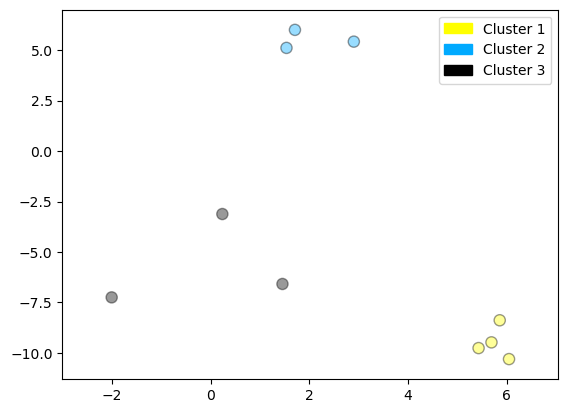

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [19]:
X1, y1 = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X1, y1, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X1)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

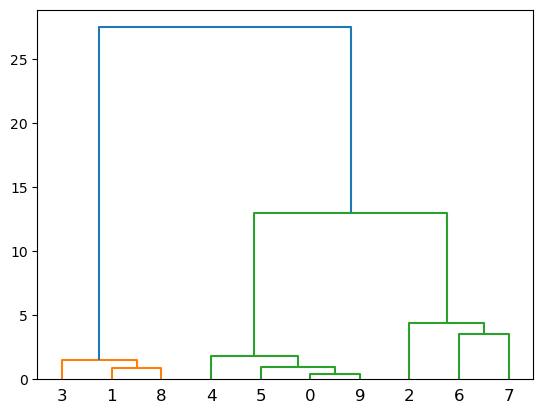

In [20]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X1))
plt.show()

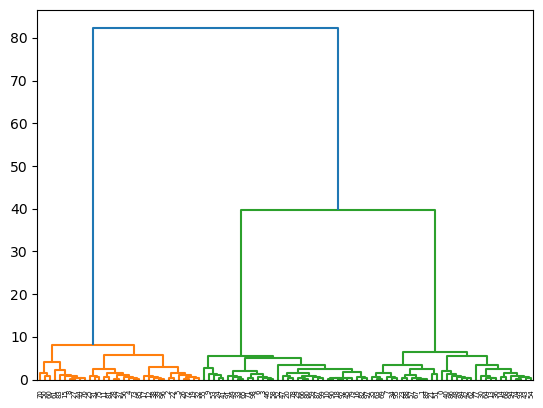

In [21]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

# LA COSA ES MAS COMPLEJA Y COSTOSA CON MUCHOES ELEMENTOS

### DBSCAN clustering

Cluster membership values:
[0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


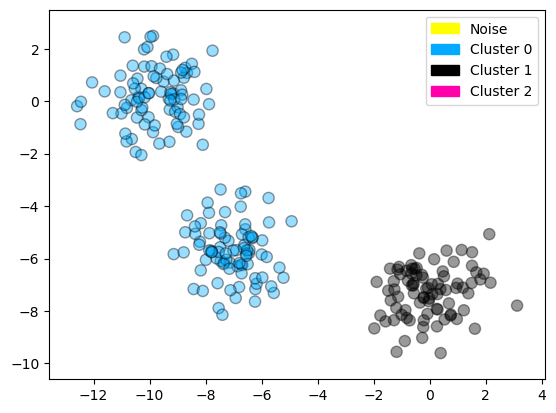

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 250)

dbscan = DBSCAN(eps = 2, min_samples = 2)

# mas eps desaparecen los outliers ....
#poner 250 samples ... y min_samles 4 al ser dimension 2 y eps el aproximado ....
#no hacen falta clusters

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

### CALCULO DE EPS OPTIMO

In [27]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=4) # n_neighbors es elvalor de min_samples que es 2*Dimension
#neighbors_fit = neighbors.fit(X)
distances, indices = neighbors.fit(X).kneighbors(X)





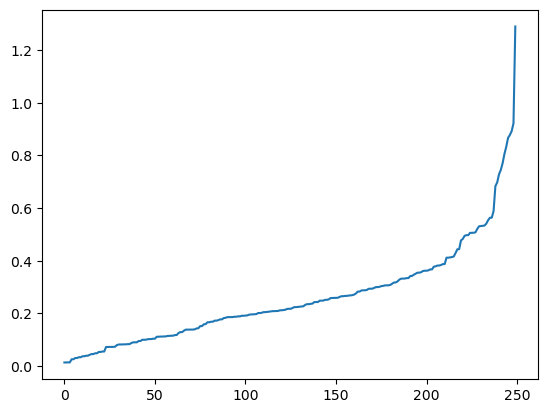

In [28]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

# Now use the libraries
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [29]:
distances

array([0.01357577, 0.01357577, 0.01396345, 0.01396345, 0.02584066,
       0.02584066, 0.0305448 , 0.0305448 , 0.03355785, 0.03355785,
       0.03721492, 0.03721492, 0.03934312, 0.03934312, 0.04284137,
       0.04551741, 0.04551741, 0.04849768, 0.04849768, 0.05361003,
       0.05361003, 0.05526933, 0.05526933, 0.07243109, 0.07244514,
       0.07244514, 0.07278583, 0.07278583, 0.07363064, 0.07956792,
       0.08190847, 0.08190847, 0.08206768, 0.08252862, 0.08252862,
       0.08330012, 0.08330012, 0.08764201, 0.09011635, 0.09015508,
       0.09015508, 0.09510669, 0.09510669, 0.09972279, 0.09972279,
       0.10004306, 0.10184924, 0.10253526, 0.10253526, 0.10396173,
       0.10396173, 0.11133007, 0.11133007, 0.11198339, 0.11198339,
       0.11258424, 0.11258424, 0.11451428, 0.11451428, 0.11524674,
       0.11524674, 0.1178106 , 0.1178106 , 0.12538733, 0.12890935,
       0.12890935, 0.13436242, 0.13830886, 0.13830886, 0.13834613,
       0.13857131, 0.13857131, 0.13962529, 0.14282955, 0.14387

## Metricas de medicion de la "compacidad"-compactness

Estimated number of clusters: 3
Estimated number of noise points: 13
Homogeneity: 0.948
Completeness: 0.892
V-measure: 0.919
Adjusted Rand Index: 0.954
Adjusted Mutual Information: 0.919
Silhouette Coefficient: 0.623


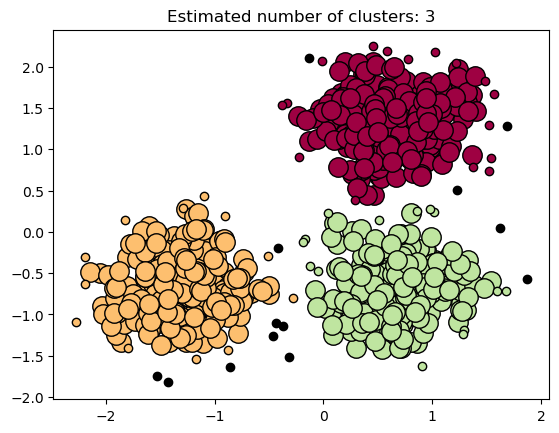

In [30]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()